In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import nltk
from nltk.corpus import stopwords
from wordcloud import WordCloud
from collections import Counter
import re

import warnings
warnings.filterwarnings('ignore')
from datetime import datetime

In [5]:
df = pd.read_csv("C:/Users/27638/fin analysis/raw_analyst_ratings.csv")  
df.head()

,Unnamed: 0,headline,url,publisher,date,stock
0,0,Stocks That Hit 52-Week Highs On Friday,https://www.benzinga.com/news/20/06/16190091/s...,Benzinga Insights,2020-06-05 10:30:54-04:00,A
1,1,Stocks That Hit 52-Week Highs On Wednesday,https://www.benzinga.com/news/20/06/16170189/s...,Benzinga Insights,2020-06-03 10:45:20-04:00,A
2,2,71 Biggest Movers From Friday,https://www.benzinga.com/news/20/05/16103463/7...,Lisa Levin,2020-05-26 04:30:07-04:00,A
3,3,46 Stocks Moving In Friday's Mid-Day Session,https://www.benzinga.com/news/20/05/16095921/4...,Lisa Levin,2020-05-22 12:45:06-04:00,A
4,4,B of A Securities Maintains Neutral on Agilent...,https://www.benzinga.com/news/20/05/16095304/b...,Vick Meyer,2020-05-22 11:38:59-04:00,A


In [7]:
df.shape

(1407328, 6)

In [9]:
df.columns

Index(['Unnamed: 0', 'headline', 'url', 'publisher', 'date', 'stock'], dtype='object')

In [11]:
df.info

<bound method DataFrame.info of          Unnamed: 0                                           headline  \
0                 0            Stocks That Hit 52-Week Highs On Friday   
1                 1         Stocks That Hit 52-Week Highs On Wednesday   
2                 2                      71 Biggest Movers From Friday   
3                 3       46 Stocks Moving In Friday's Mid-Day Session   
4                 4  B of A Securities Maintains Neutral on Agilent...   
...             ...                                                ...   
1407323     1413844             Top Narrow Based Indexes For August 29   
1407324     1413845  Recap: Wednesday's Top Percentage Gainers and ...   
1407325     1413846  UPDATE: Oppenheimer Color on China Zenix Auto ...   
1407326     1413847  Oppenheimer Initiates China Zenix At Outperfor...   
1407327     1413848  China Zenix Auto International Opens For Tradi...   

                                                       url          publisher  

In [13]:
print("\nMissing values:")
print(df.isnull().sum())


Missing values:
Unnamed: 0    0
headline      0
url           0
publisher     0
date          0
stock         0
dtype: int64


In [19]:
df.shape

(1407328, 7)

In [15]:
df['headline_length'] = df['headline'].astype(str).apply(len)

In [17]:

df['headline_length'].describe()

count    1.407328e+06
mean     7.312051e+01
std      4.073531e+01
min      3.000000e+00
25%      4.700000e+01
50%      6.400000e+01
75%      8.700000e+01
max      5.120000e+02
Name: headline_length, dtype: float64

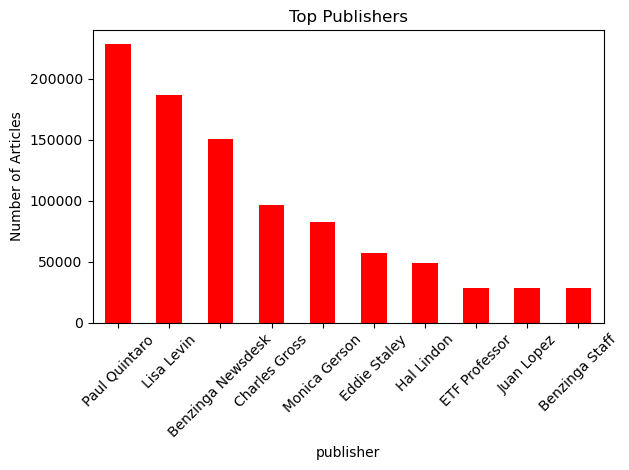

In [25]:
df['publisher'].value_counts().head(10).plot(kind='bar', title='Top Publishers', color = 'red')
plt.ylabel("Number of Articles")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

In [27]:
## change date time format and check pubication date
df['date'] = pd.to_datetime(df['date'], errors='coerce')

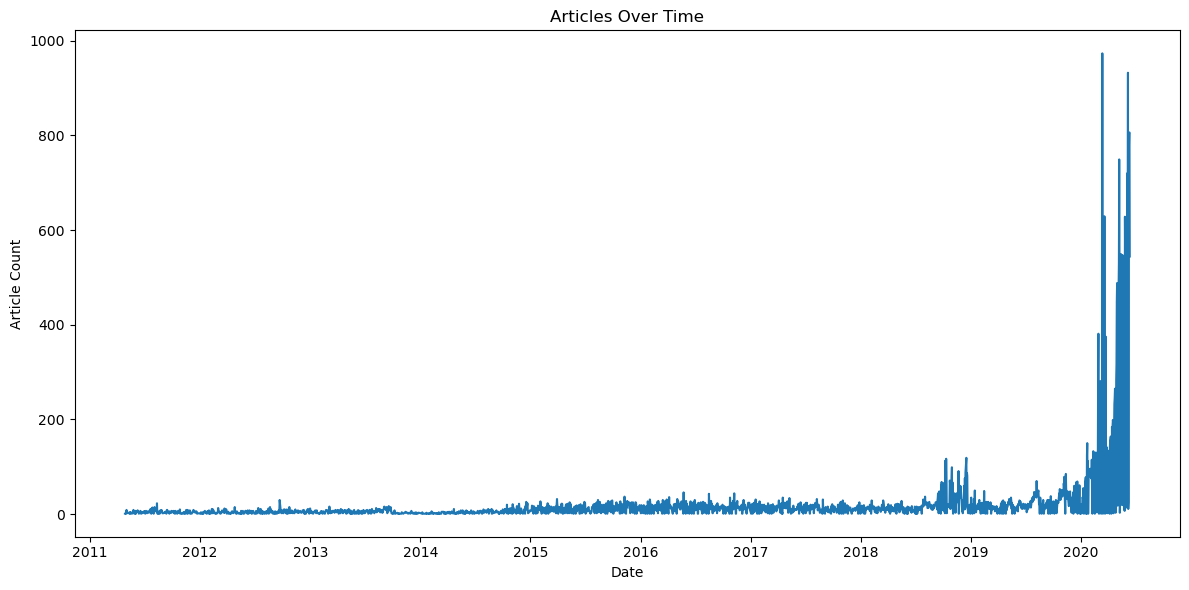

In [29]:
df['date'].dt.date.value_counts().sort_index().plot(figsize=(12,6), title='Articles Over Time')
plt.ylabel("Article Count")
plt.xlabel("Date")
plt.tight_layout()
plt.show()

#### Text Analysis 

In [34]:
import nltk

In [36]:
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\27638\AppData\Roaming\nltk_data...
[nltk_data]   Unzipping corpora\stopwords.zip.


True

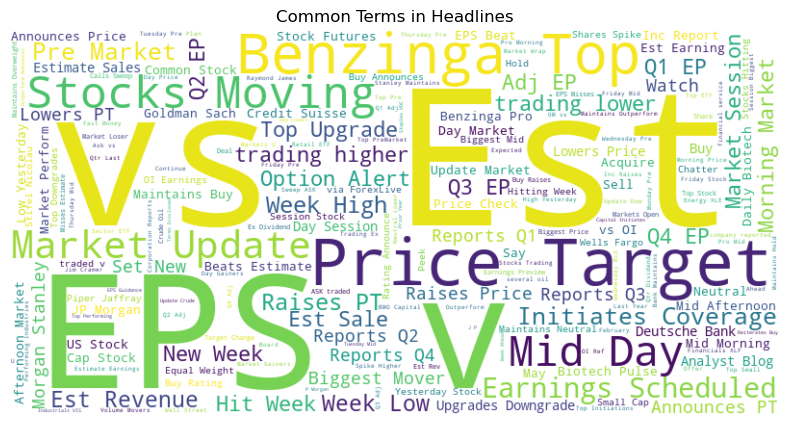

In [38]:
## using word colud 
text = " ".join(df['headline'].dropna().astype(str).tolist())

wordcloud = WordCloud(width=800, height=400, background_color='white', stopwords=stopwords.words('english')).generate(text)

plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('Common Terms in Headlines')
plt.show()

##### Common keyword 

In [41]:
tokens = []
for headline in df['headline'].dropna().astype(str):
    words = re.findall(r'\b\w+\b', headline.lower())
    words = [w for w in words if w not in stopwords.words('english')]
    tokens.extend(words)

counter = Counter(tokens)
common_words = counter.most_common(20)


KeyboardInterrupt: 